# Handwritten Digit Recognition using CSV MNIST Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

## Load CSV Files

In [2]:
train_df = pd.read_csv("mnist_train.csv")
test_df = pd.read_csv("mnist_test.csv")

## Preprocess the Data

In [3]:
x_train = train_df.iloc[:, 1:].values / 255.0
y_train = to_categorical(train_df.iloc[:, 0].values)

x_test = test_df.iloc[:, 1:].values / 255.0
y_test = to_categorical(test_df.iloc[:, 0].values)

## Build and Compile the Model

In [4]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Train the Model

In [5]:
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7067 - loss: 1.0078 - val_accuracy: 0.9016 - val_loss: nan
Epoch 2/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9352 - loss: 0.2261 - val_accuracy: 0.9201 - val_loss: nan
Epoch 3/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9527 - loss: 0.1619 - val_accuracy: 0.9234 - val_loss: nan
Epoch 4/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9682 - loss: 0.1095 - val_accuracy: 0.9297 - val_loss: nan
Epoch 5/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9750 - loss: 0.0808 - val_accuracy: 0.9293 - val_loss: nan


## Evaluate the Model

In [6]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9297 - loss: 0.2231
Test Accuracy: 0.9391


## Predict and Visualize Results

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


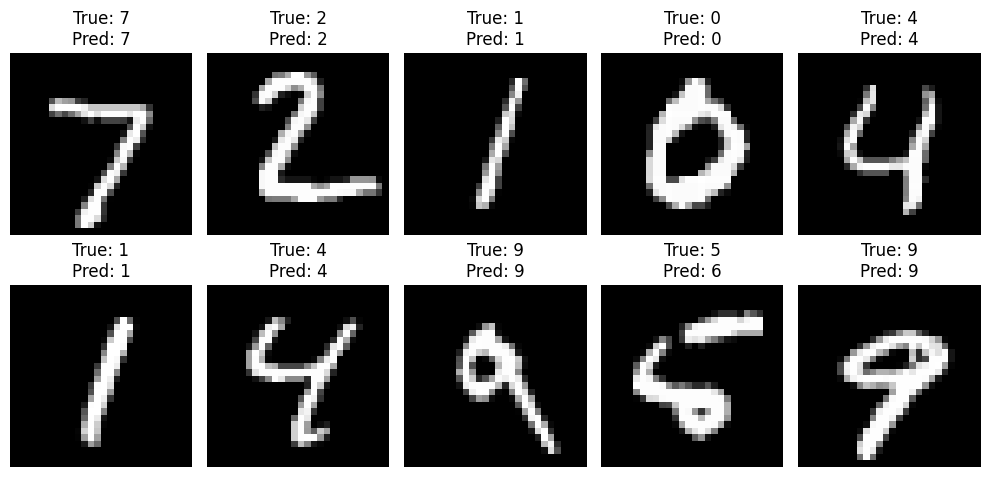

In [7]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

plt.figure(figsize=(10, 5))
for i in range(10):
    image = x_test[i].reshape(28, 28)
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()